<a href="https://colab.research.google.com/github/EdwardWilhelm21/Implied-Volatility-Graphing/blob/main/IV_Graphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def get_option_data(ticker, option_type='calls'):

  ticker = yf.Ticker(ticker)
  expirations = ticker.options

  df = pd.DataFrame()
  new_options = pd.DataFrame()

  for exp in expirations:

    if option_type == 'puts':
      new_option = ticker.option_chain(exp).puts
    else:
      new_options = ticker.option_chain(exp).calls

    new_options['expiration'] = pd.to_datetime(exp)

    df = pd.concat([df, new_options])

  df.drop(['lastTradeDate', 'lastPrice', 'bid', 'ask', 'change', 'percentChange', 'openInterest', 'inTheMoney', 'contractSize', 'currency', 'volume'], axis=1, inplace=True)

  df["daysToExpiration"] = (df.expiration - dt.datetime.today()).dt.days + 1

  return df



In [ ]:
def term_structure_graph(options_data, ticker, option_type='calls'):

  ticker = yf.Ticker(ticker)
  price = ticker.info['currentPrice']

  strikes = options_data['strike']



  if option_type == 'puts':
    strikes = strikes[strikes > price]
    atm_strike = strikes.min()
  else:
    strikes = strikes[strikes < price]
    atm_strike = strikes.max()

  print('ATM Strike: ')
  print(atm_strike)

  atm_options_data = options_data[options_data['strike'] == atm_strike]



  atm_options_data.set_index("expiration", inplace=True)

  # Plotting implied volatility term structure
  ax = atm_options_data[["impliedVolatility"]].plot(
      title="Implied Volatility Term Structure",
      figsize=(12, 8),
      linestyle="-",
      marker='o',
      color='b',
  )

  # Customize appearance
  ax.set_xlabel("Expiration")
  ax.set_ylabel("Implied Volatility")
  ax.grid(True, linestyle='--', alpha=0.7)

  # Add legend
  ax.legend(["Implied Volatility"], loc="upper right")

  # Show the plot
  plt.show()

In [ ]:
def iv_surface_graph(options_data):
    surface = (
        options_data[['daysToExpiration', 'strike', 'impliedVolatility']]
        .pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration')
        .dropna()
    )
    # create the figure object
    fig = plt.figure(figsize=(20, 15))
    # add the subplot with projection argument
    ax = fig.add_subplot(111, projection='3d')
    # get the 1d values from the pivoted dataframe
    x, y, z = surface.columns.values, surface.index.values, surface.values
    # return coordinate matrices from coordinate vectors
    X, Y = np.meshgrid(x, y)
    # set labels
    ax.set_xlabel('Days to Expiration')
    ax.set_ylabel('Strike Price')
    ax.set_zlabel('Implied Volatility')
    ax.set_title('Implied Volatility Surface')

    # plot with color mapping and customizations
    surface_plot = ax.plot_surface(X, Y, z, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
    fig.colorbar(surface_plot, ax=ax, shrink=0.5, aspect=10)

    plt.show()

AAPL


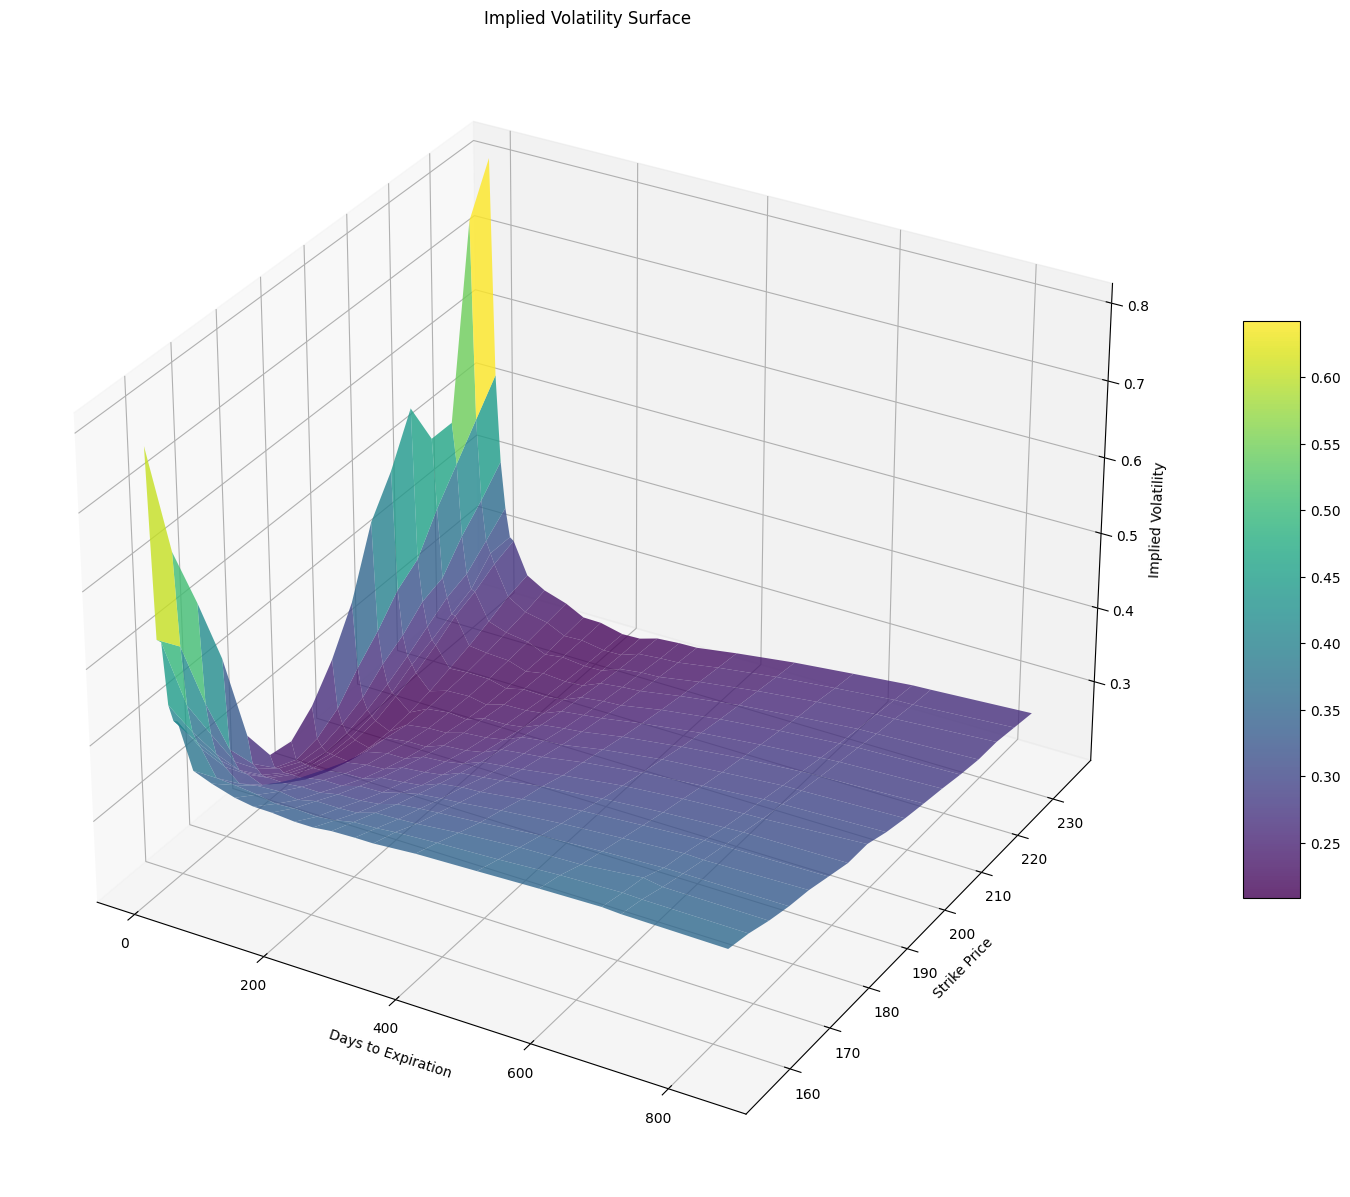

ATM Strike: 
180.0


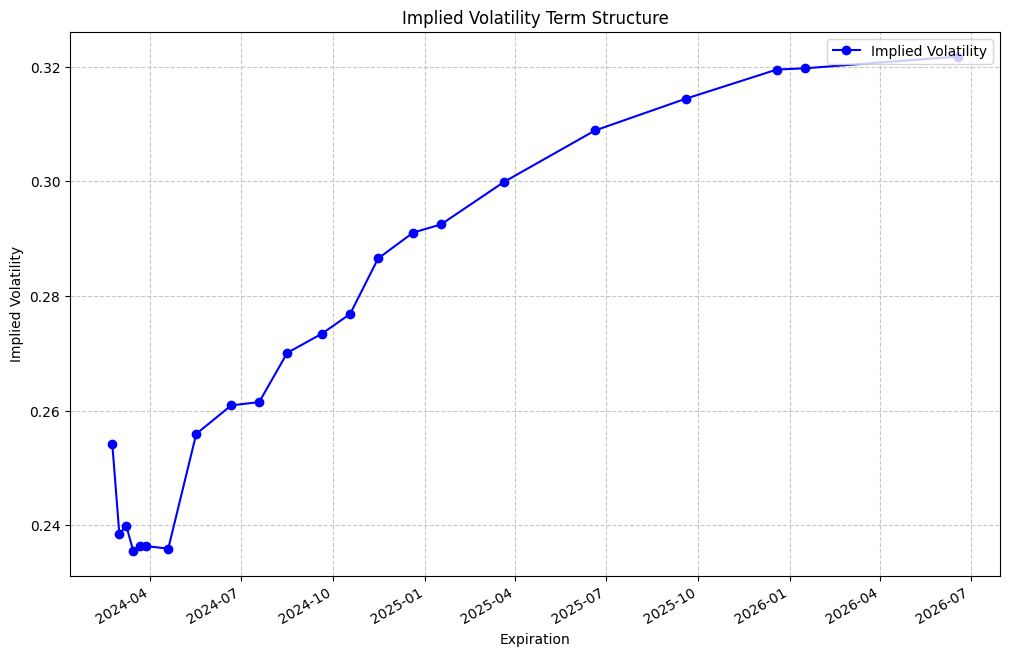

In [ ]:
ticker = 'AAPL'
print(ticker)

options_data = get_option_data(ticker)

iv_surface_graph(options_data)

term_structure_graph(options_data, ticker)

SOFI


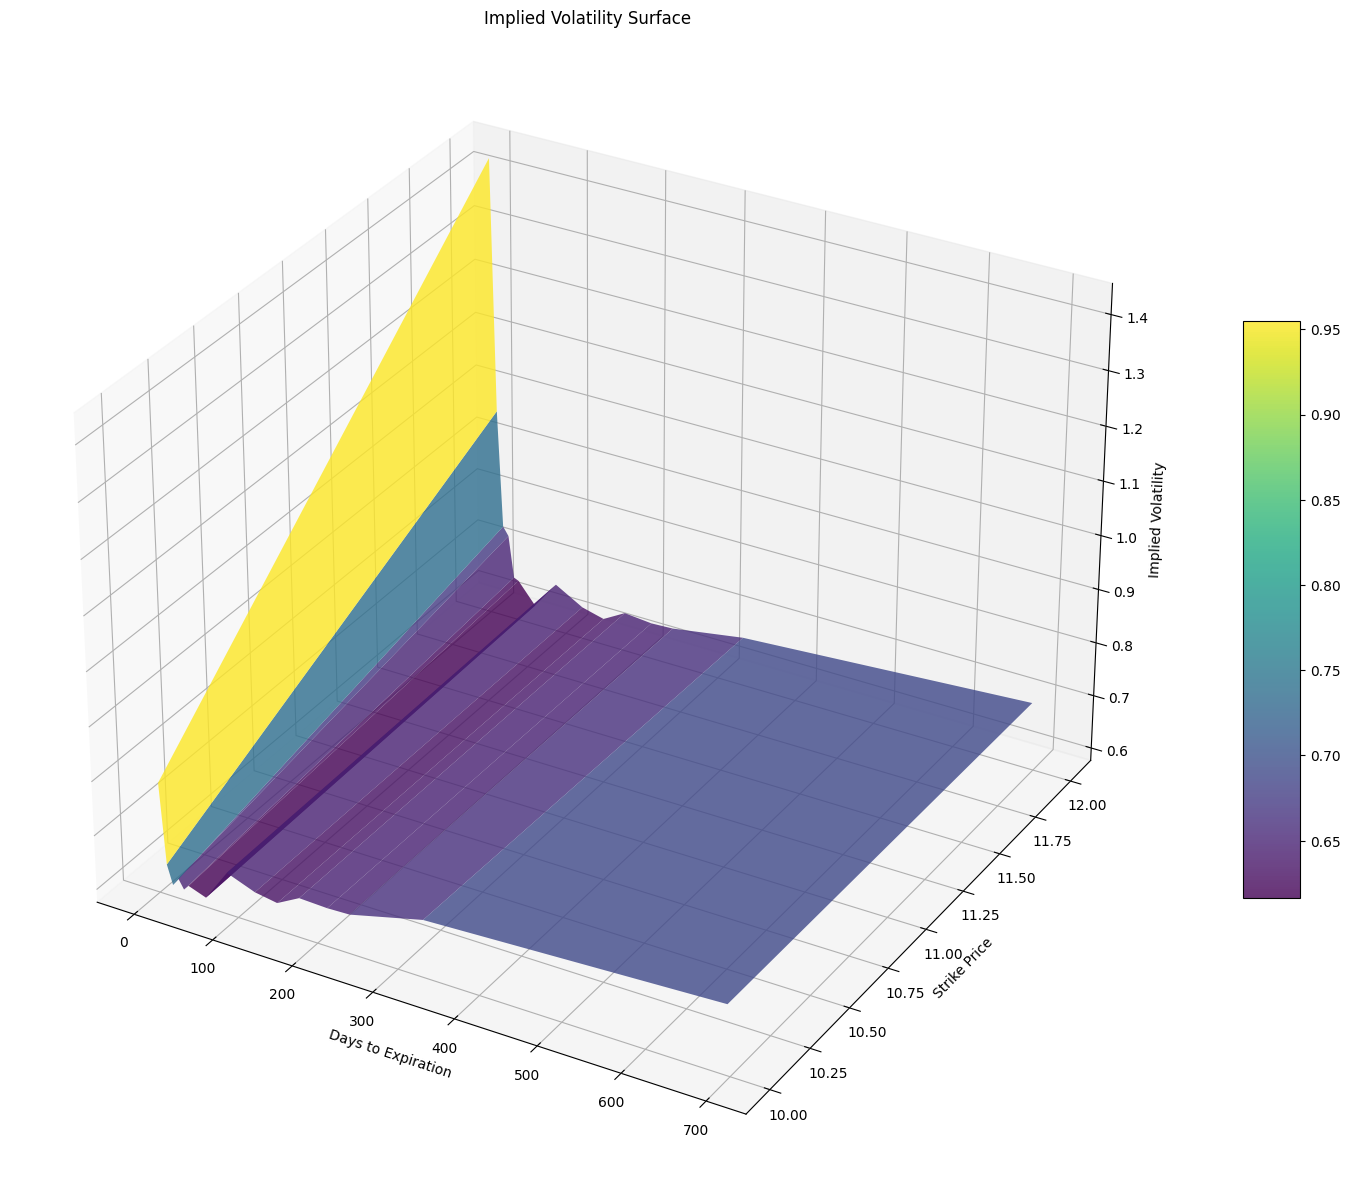

ATM Strike: 
8.0


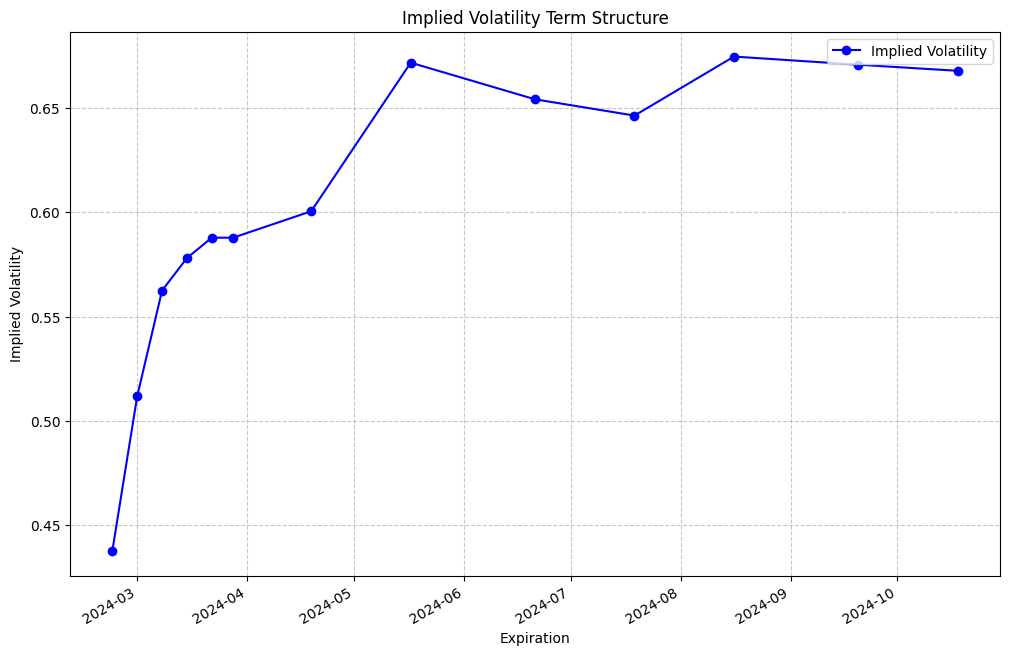

In [ ]:
ticker = 'SOFI'
print(ticker)

options_data = get_option_data(ticker)

iv_surface_graph(options_data)

term_structure_graph(options_data, ticker)